In [11]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [12]:
phishing_df = pd.read_csv('phishing.csv')\

phishing_df = phishing_df.dropna()
phishing_df = phishing_df.drop_duplicates()
phishing_df = phishing_df.drop(columns=['Index'])
phishing_df = phishing_df.drop(columns=['WebsiteTraffic'])


In [13]:
print(phishing_df.info())
print(phishing_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

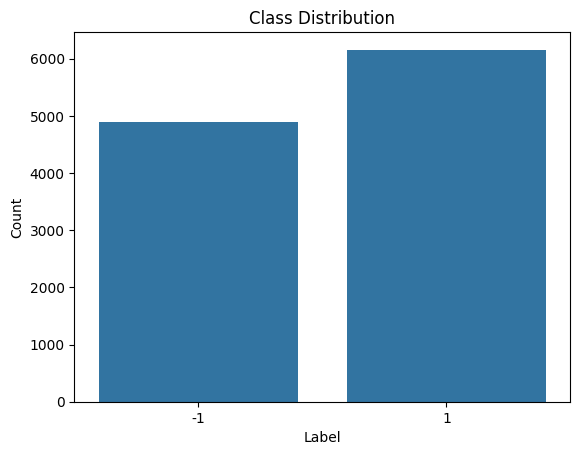

In [14]:
sns.countplot(x='class', data=phishing_df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [15]:
phishing_df.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X = phishing_df.iloc[:, :-1].values  # Features
y = phishing_df.iloc[:, -1].values   # Labels
print(X.shape)
print(y.shape)

(11054, 30)
(11054,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with one neuron and sigmoid activation
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
time_start = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
time_end = time.time()
print(f"Training time: {time_end - time_start:.2f}s")

Epoch 1/20
111/111 [==============================] - 2s 8ms/step - loss: -0.2756 - accuracy: 0.3586 - precision: 1.0000 - recall: 0.4525 - val_loss: -1.4828 - val_accuracy: 0.4839 - val_precision: 1.0000 - val_recall: 0.5122
Epoch 2/20
111/111 [==============================] - 1s 9ms/step - loss: -3.3959 - accuracy: 0.4453 - precision: 1.0000 - recall: 0.4736 - val_loss: -5.5475 - val_accuracy: 0.5229 - val_precision: 1.0000 - val_recall: 0.5557
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: -7.7883 - accuracy: 0.4705 - precision: 1.0000 - recall: 0.5006 - val_loss: -10.7417 - val_accuracy: 0.5382 - val_precision: 1.0000 - val_recall: 0.5828
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: -13.9549 - accuracy: 0.4806 - precision: 1.0000 - recall: 0.5129 - val_loss: -17.7986 - val_accuracy: 0.5432 - val_precision: 1.0000 - val_recall: 0.5828
Epoch 5/20
111/111 [==============================] - 0s 4ms/step - loss: -21.5847 - accuracy

In [27]:
y_pred = model.predict(X_test[0:1])
print(-1 if y_pred[0][0] < 1 else 1)
print(y_test[0:1])

1/1 [==============================] - 0s 19ms/step
-1
[-1]


In [20]:
# Predict probabilities on test data
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='weighted')  # or average='micro' or average='macro'
recall = recall_score(y_test, y_pred_binary, average='weighted')  # or average='micro' or average='macro'
f1 = f1_score(y_test, y_pred_binary, average='weighted')  # or average='micro' or average='macro'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


70/70 [==============================] - 0s 993us/step
Accuracy: 0.41655359565807326
Precision: 0.554955437581144
Recall: 0.41655359565807326
F1 Score: 0.47589610604784505


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


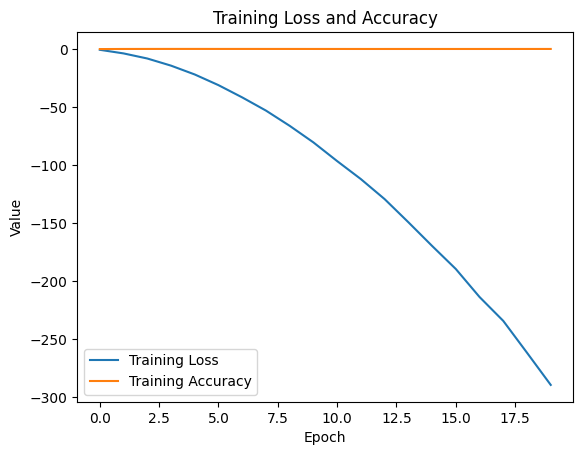

In [21]:
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss and Accuracy')
    plt.legend()
    plt.show()

# Assuming 'history' is the history object returned by model.fit()
plot_training_history(history)

70/70 [==============================] - 0s 1ms/step


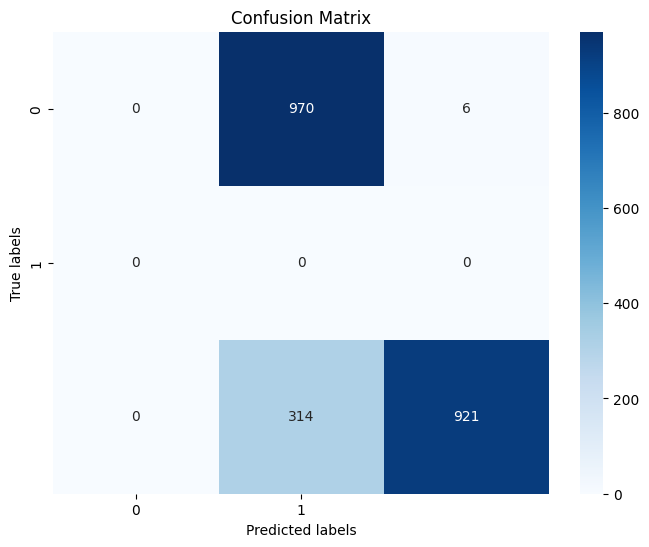

In [36]:
y_pred_proba = model.predict(X_test)

# Step 2: Convert probabilities to binary predictions based on a threshold (if needed)
# Example: Using a threshold of 0.5
y_pred_binary = (y_pred_proba >= 0.5).astype(np.int32)

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()